# DTSC670: Foundations of Machine Learning Models
## Module 2
## Assignment 3: Multiple Linear Regression

#### Name Trenton Middleton:

The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. 

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
#%matplotlib inline
%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [2]:
#IMPORT DATA
# Use read.csv to read the file saved in the directory

fileName = "MultipleLinearRegression.csv"
import_df = pd.read_csv(fileName)
import_df


,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506
...,...,...,...
70,18.068038,16.252976,396.115249
71,2.749494,3.433744,68.351161
72,2.785527,2.817559,58.948555
73,16.147826,16.344096,382.447605


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

<IPython.core.display.Javascript object>


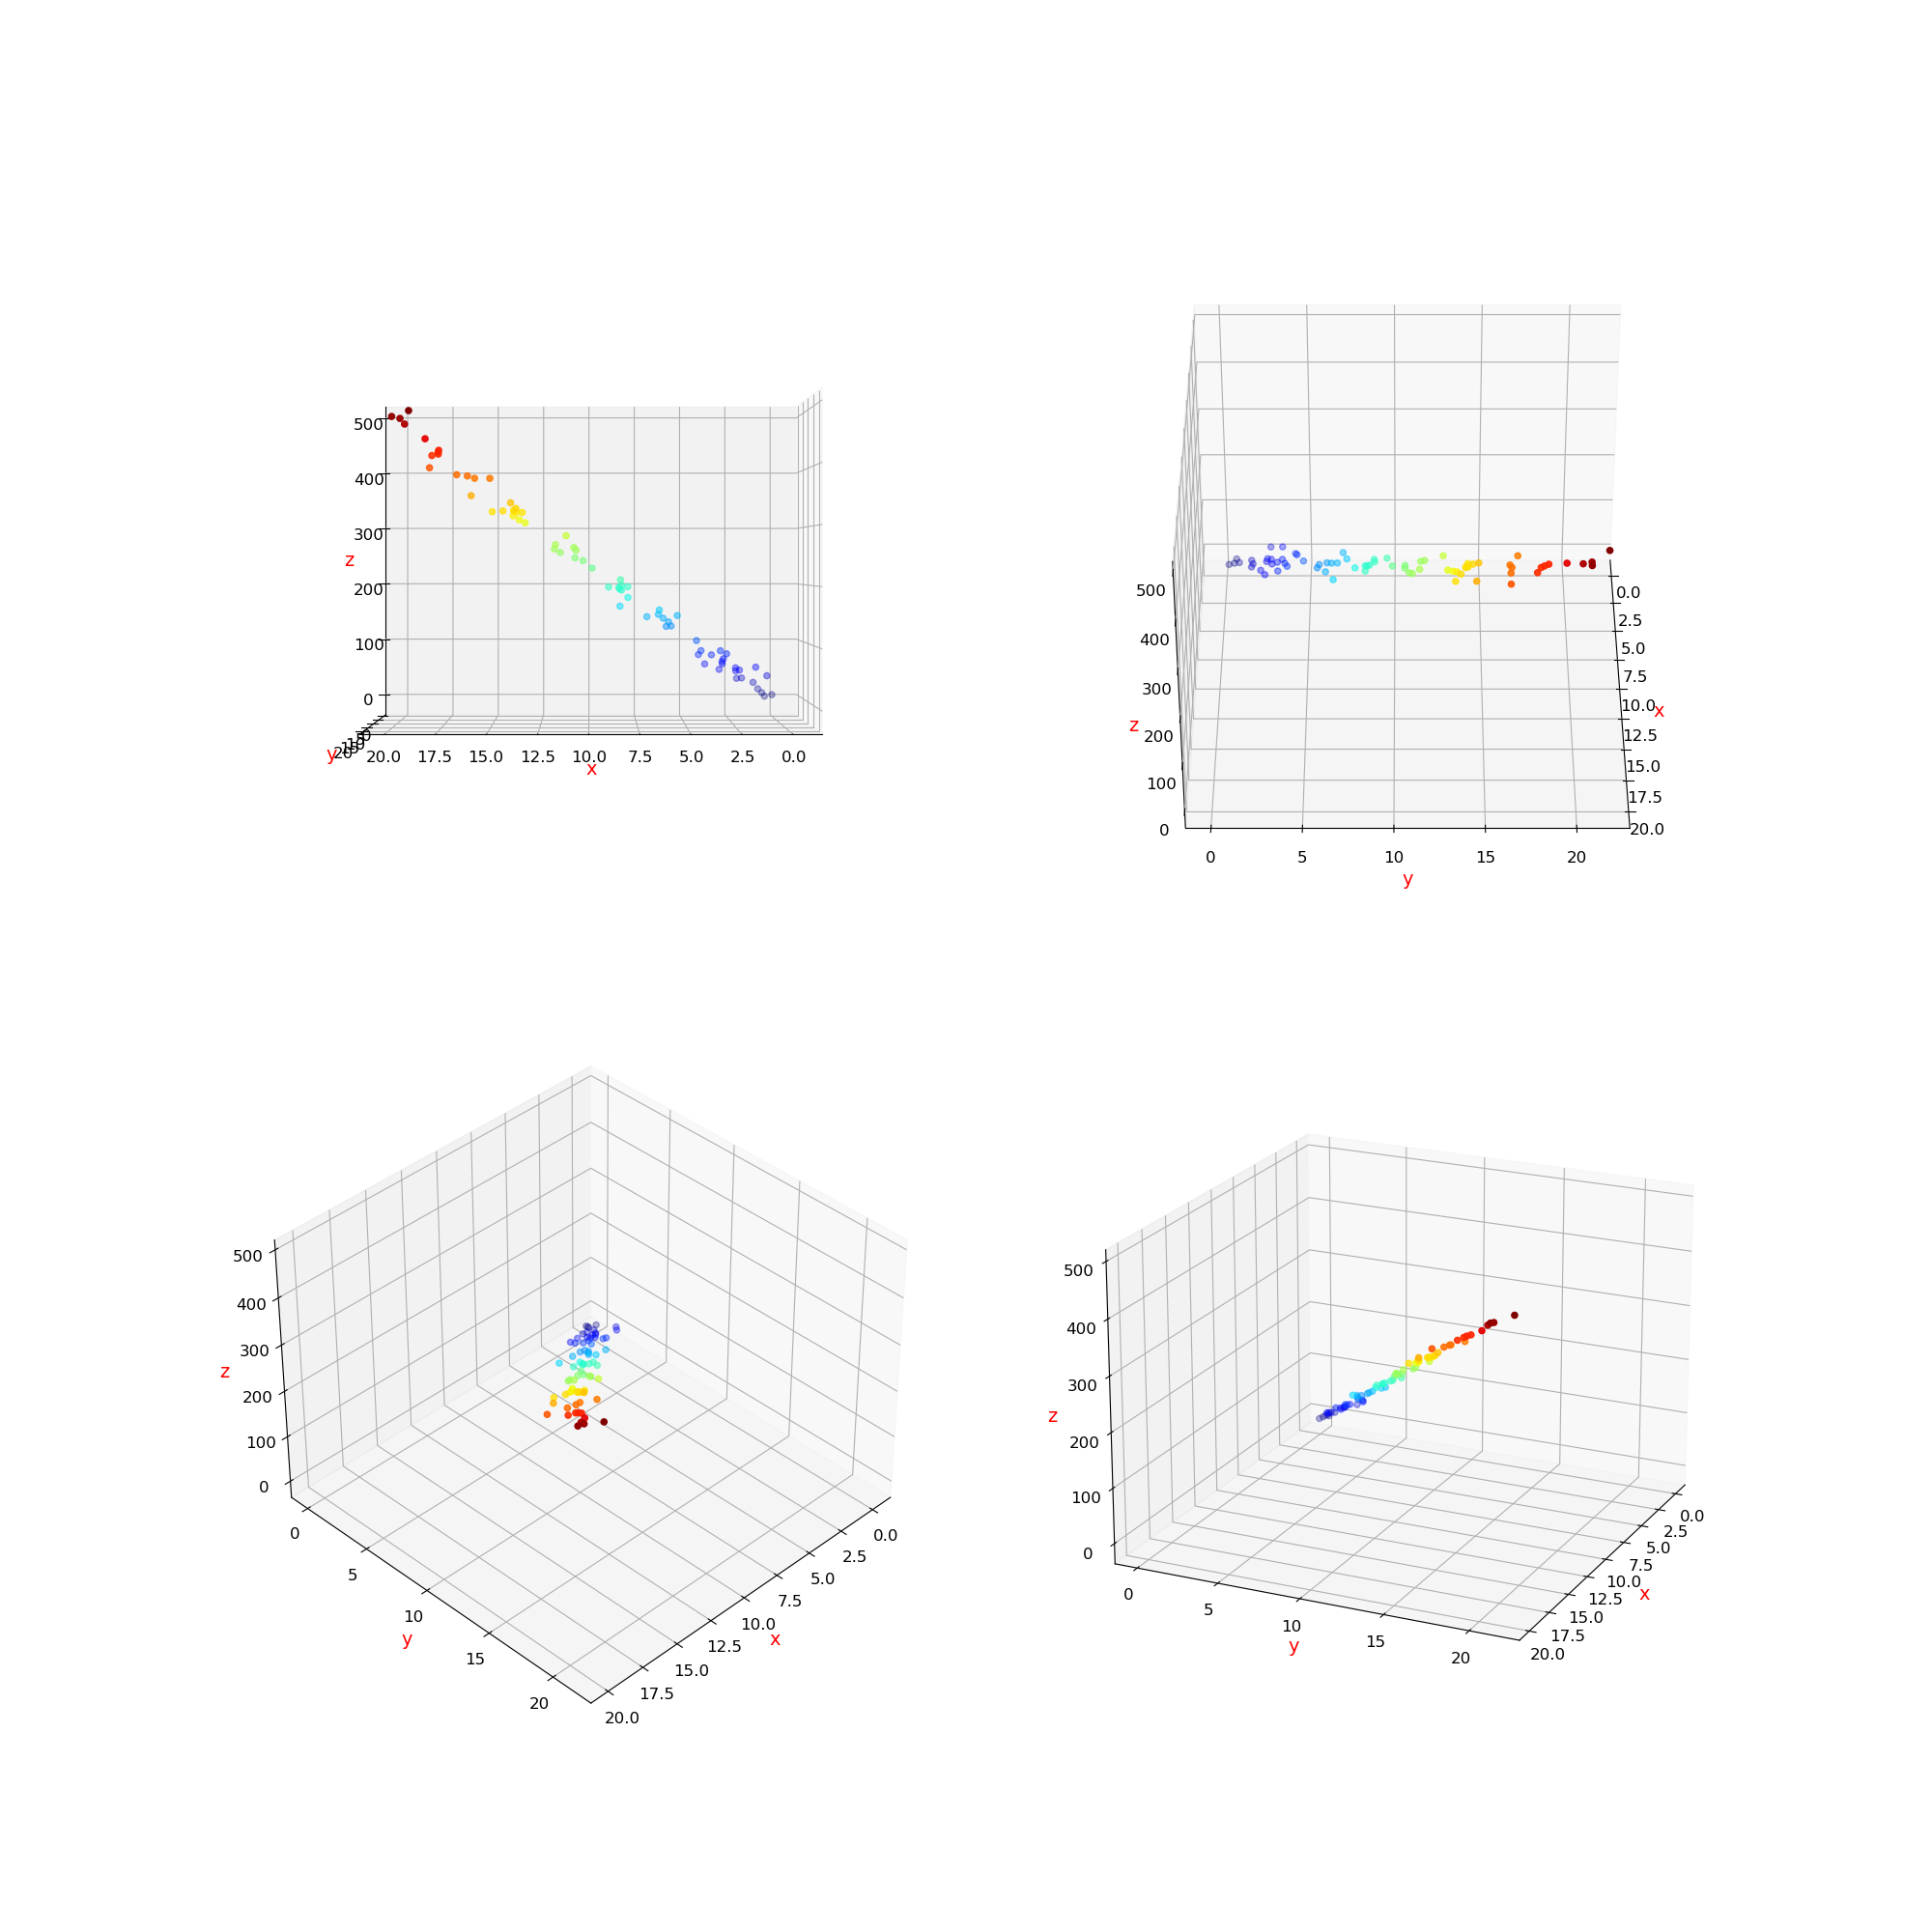

In [3]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=[20,20])

#main information for all 4 subplots.
#setting the values from the dataframe above for use of the 4 subplots.  Color set to jet and oppropriate angles set via view_init
x = import_df['x'].values
y = import_df['y'].values
z = import_df['z'].values

#Creation of subplot #1
ax1 = fig.add_subplot (2,2,1, projection = '3d')
ax1.set_xlabel('x', c= 'r')
ax1.set_ylabel('y', c ='r')
ax1.set_zlabel('z', c= 'r')
ax1.view_init(0,90)
ax1.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #2
ax2 = fig.add_subplot (2,2,2, projection = '3d')
ax2.set_xlabel('x', c= 'r')
ax2.set_ylabel('y', c ='r')
ax2.set_zlabel('z', c= 'r')
ax2.view_init(37,0)
ax2.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #3
ax3 = fig.add_subplot (2,2,3, projection = '3d')
ax3.set_xlabel('x', c= 'r')
ax3.set_ylabel('y', c ='r')
ax3.set_zlabel('z', c= 'r')
ax3.view_init(38,45)
ax3.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #4
ax4 = fig.add_subplot (2,2,4, projection = '3d')
ax4.set_xlabel('x', c= 'r')
ax4.set_ylabel('y', c ='r')
ax4.set_zlabel('z', c= 'r')
ax4.view_init(20,25)
ax4.scatter3D(x, y, z, c= z, cmap='jet', marker='o')



# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response. 

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [4]:
#PREPARE FOR AND PERFORM LINEAR REGRESSION
# Create 'Features' dataframe from the orginal download that is column x, y, and z
features = import_df

# Create 'response' from just the z column in orginal dataframe
response = features['z']
response = pd.DataFrame(response)

# Drop the z column from 'Features' column to now just have X and Y
features = features.drop (['z'], axis = 1)


from sklearn.linear_model import LinearRegression
# Create "model" perform linear regression model fitting
model = LinearRegression()
model.fit(features, response)

# Examine linear repression model paramters by viewing Coefficients and Intercept
print ("Model Coefficients: ", model.coef_)
print("Model Intercept : ", model.intercept_)



Model Coefficients:  [[ 8.02602396 15.95639323]]
Model Intercept :  [-8.63287678]


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed together as a DataFrame to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.

In [5]:

from sklearn.linear_model import LinearRegression

# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit

# Create a dataframe from the above X_fit, then rename the column name to x_fit and add y_fit 
# to the dataframe to prepare to make the prediction of z_fit 
features= pd.DataFrame({'x_fit': x_fit, 'y_fit':y_fit})

# Make the z_fit prediction
model = model.predict(features)
z_fit= pd.DataFrame(model)
z_fit = z_fit.rename(columns = {0:'z_fit'})

#add z_fit to features dataframe
features['z_fit'] = z_fit
features

,x_fit,y_fit,z_fit
0,0.000000,0.000000,-8.632877
1,0.021021,0.021021,-8.128742
2,0.042042,0.042042,-7.624607
3,0.063063,0.063063,-7.120472
4,0.084084,0.084084,-6.616337
...,...,...,...
995,20.915916,20.915916,492.981345
996,20.936937,20.936937,493.485480
997,20.957958,20.957958,493.989614
998,20.978979,20.978979,494.493749


Recreate the first image, but plot the line of best fit in each of the subplots as well.

<IPython.core.display.Javascript object>


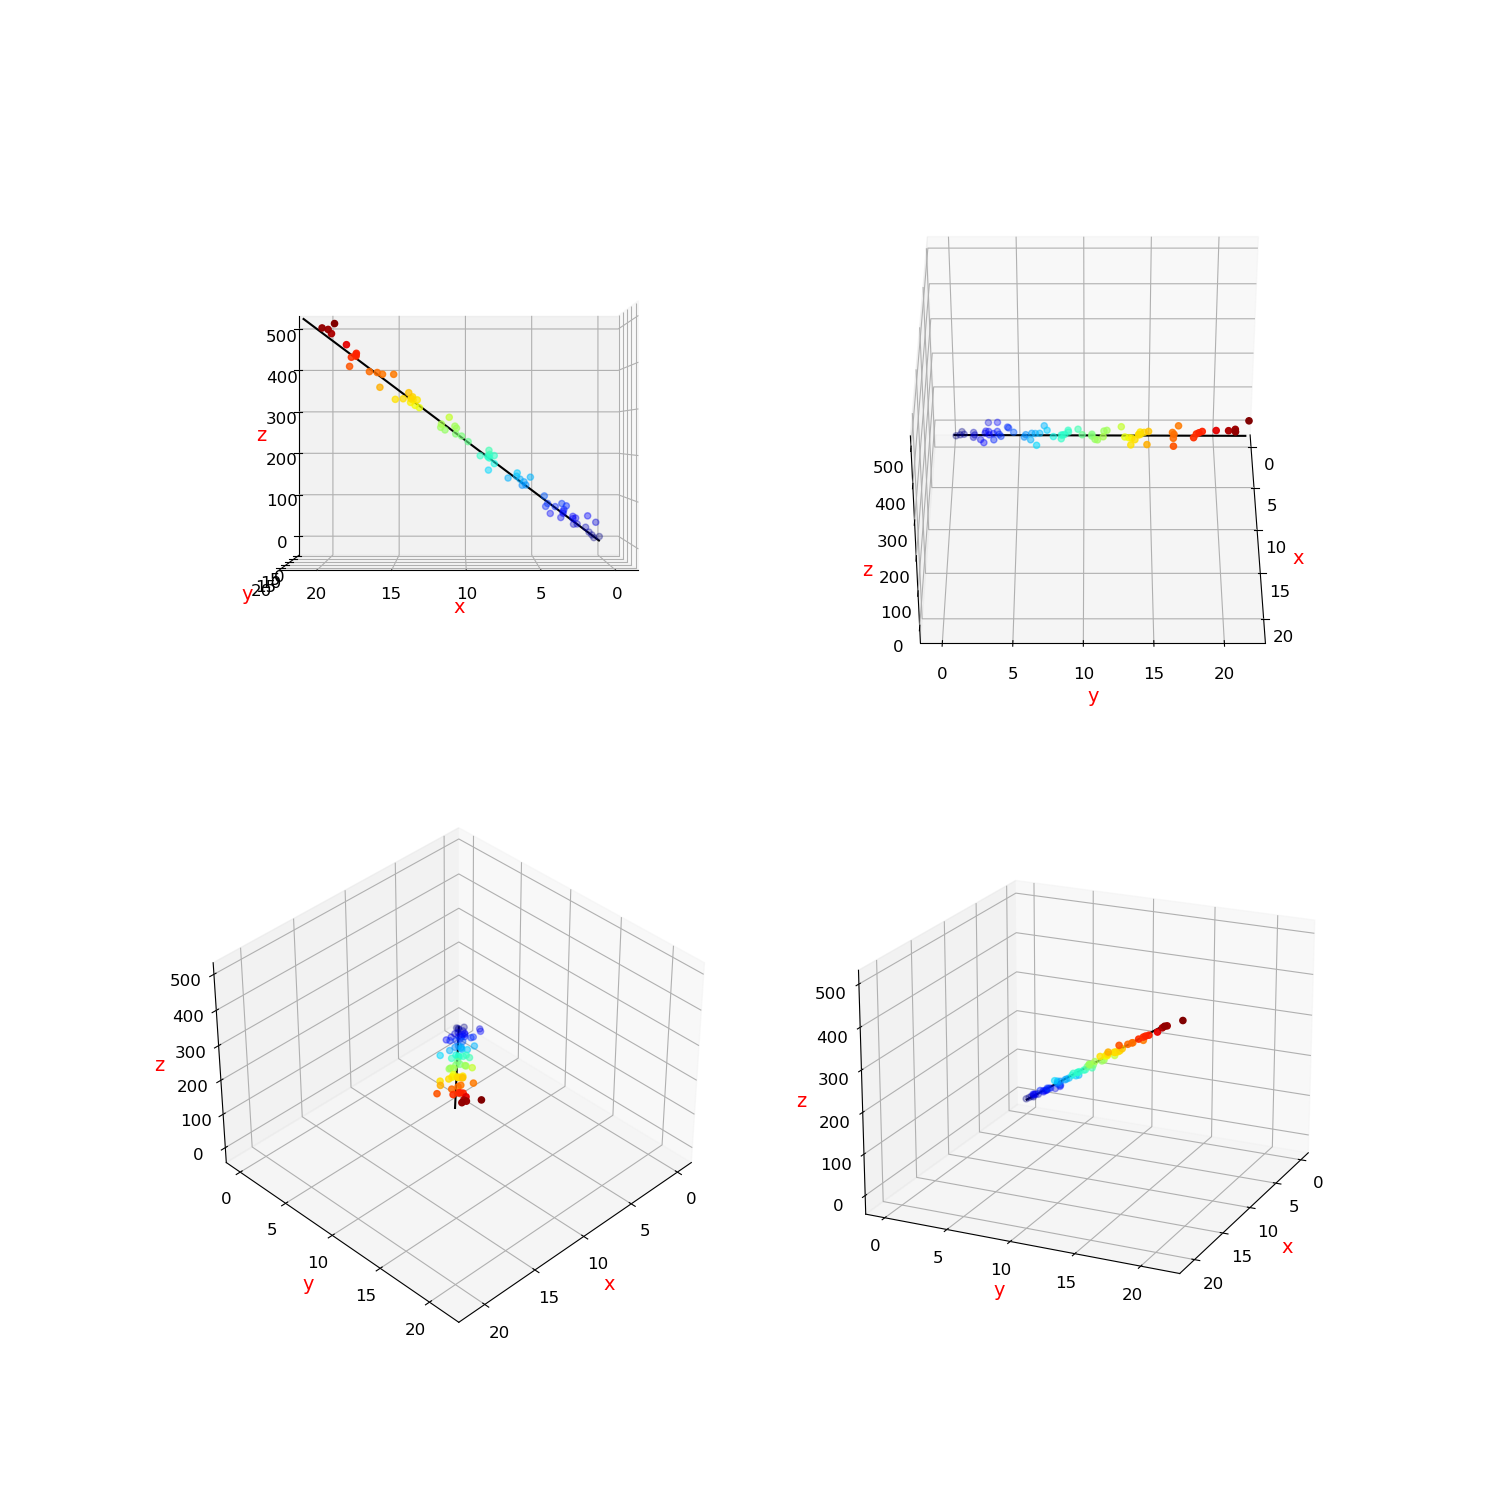

In [6]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=[15,15])

#2nd image subplots.  These include x, y and z from orginal data (jet color) and x_fit, y_fit and z_fit (black line)
#setting the values from the dataframe above for use of the 4 subplots
x2 = features['x_fit'].values
y2 = features['y_fit'].values
z2 = features['z_fit'].values

#Creation of subplot #1, 2nd image
ax1 = fig.add_subplot (2,2,1, projection = '3d')
ax1.set_xlabel('x', c= 'r')
ax1.set_ylabel('y', c ='r')
ax1.set_zlabel('z', c= 'r')
ax1.view_init(0,90)
ax1.plot3D(x2, y2, z2, c= 'k')
ax1.scatter3D(x, y, z, c= z, cmap='jet', marker='o')

#Creation of subplot #2, 2nd image
ax2 = fig.add_subplot (2,2,2, projection = '3d')
ax2.set_xlabel('x', c= 'r')
ax2.set_ylabel('y', c ='r')
ax2.set_zlabel('z', c= 'r')
ax2.view_init(37,0)
ax2.plot3D(x2, y2, z2, c= 'k')
ax2.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #3, 2nd image
ax3 = fig.add_subplot (2,2,3, projection = '3d')
ax3.set_xlabel('x', c= 'r')
ax3.set_ylabel('y', c ='r')
ax3.set_zlabel('z', c= 'r')
ax3.view_init(38,45)
ax3.plot3D(x2, y2, z2, c= 'k')
ax3.scatter3D(x, y, z, c= z, cmap='jet', marker='o')


#Creation of subplot #4, 2nd image
ax4 = fig.add_subplot (2,2,4, projection = '3d')
ax4.set_xlabel('x', c= 'r')
ax4.set_ylabel('y', c ='r')
ax4.set_zlabel('z', c= 'r')
ax4.view_init(20,25)
ax4.plot3D(x2, y2, z2, c= 'k')
ax4.scatter3D(x, y, z, c= z, cmap='jet', marker='o')




# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters. 

The true model parameters that I selected are <b>integer values</b> (big hint here). Given this information, you must look at the model coefficients that the regression algorithm computed, and infer the integer values that were used for the true model parameters. You may "hard-code" these values into the below print statements.

In [7]:
# Rounded to full integer based on regression modeled Coefficients:  [[ 8.02602396 15.95639323]]
# Model Intercept :  [-8.63287678]

print("True Model Coefficients: ", 8 , 16)
print("True Model Intercept : ", -9 )

True Model Coefficients:  8 16
True Model Intercept :  -9
